In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from pca import pca
import seaborn as sns

In [3]:
mall = pd.read_csv("processed_train.csv")

In [4]:
mall.head()

,Item_Identifier,i_weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,O_Size
0,DRA12,11.600,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,Tier 2,Supermarket Type1,2552.6772,Medium
1,DRA24,19.350,Regular,0.040154,Soft Drinks,164.6868,OUT017,2007,Tier 2,Supermarket Type1,1146.5076,Medium
2,DRA59,8.270,Regular,0.000000,Soft Drinks,183.2924,OUT017,2007,Tier 2,Supermarket Type1,2406.2012,Medium
3,DRB13,6.115,Regular,0.007084,Soft Drinks,191.1530,OUT017,2007,Tier 2,Supermarket Type1,3415.5540,Medium
4,DRB24,8.785,Low Fat,0.020694,Soft Drinks,153.1656,OUT017,2007,Tier 2,Supermarket Type1,1853.5872,Medium


In [5]:
X = mall.drop(["Item_Identifier","Item_Outlet_Sales","Outlet_Identifier"], axis=1)

In [6]:
dummy = pd.get_dummies(X, drop_first=True)

In [7]:
dummy.head()

,i_weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,O_Size_Medium,O_Size_Small
0,11.600,0.041178,140.3154,2007,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,19.350,0.040154,164.6868,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,8.270,0.000000,183.2924,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,6.115,0.007084,191.1530,2007,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,8.785,0.020694,153.1656,2007,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0


In [8]:
scalar = StandardScaler()

In [9]:
scaled_mall = scalar.fit_transform(dummy)

In [16]:
scaled_mall.shape

(8523, 27)

In [10]:
pca = PCA()

In [11]:
prin_comp = pca.fit_transform(scaled_mall)

In [12]:
print(pca.explained_variance_)

[3.31748358e+00 1.97838013e+00 1.49551178e+00 1.34204537e+00
 1.19601813e+00 1.16685122e+00 1.12497843e+00 1.10535408e+00
 1.09609107e+00 1.08146238e+00 1.06694424e+00 1.04998603e+00
 1.03385423e+00 1.02784481e+00 1.02639828e+00 1.01804472e+00
 1.00844545e+00 9.49733414e-01 8.98460646e-01 8.86737356e-01
 7.46704518e-01 6.10581966e-01 4.35012623e-01 1.43677916e-01
 1.13402568e-01 8.24433640e-02 7.19978279e-04]


In [13]:
print(pca.explained_variance_ratio_ * 100)

[1.22855346e+01 7.32647409e+00 5.53828265e+00 4.96995523e+00
 4.42917704e+00 4.32116411e+00 4.16609791e+00 4.09342366e+00
 4.05912024e+00 4.00494626e+00 3.95118168e+00 3.88838088e+00
 3.82864047e+00 3.80638597e+00 3.80102908e+00 3.77009362e+00
 3.73454492e+00 3.51711845e+00 3.32724159e+00 3.28382709e+00
 2.76524780e+00 2.26114936e+00 1.61096883e+00 5.32077995e-01
 4.19960233e-01 3.05309967e-01 2.66627335e-03]


In [21]:
ys=np.cumsum(pca.explained_variance_ratio_ * 100)
ys

array([ 12.28553459,  19.61200868,  25.15029133,  30.12024656,
        34.5494236 ,  38.87058771,  43.03668562,  47.13010928,
        51.18922952,  55.19417577,  59.14535745,  63.03373834,
        66.86237881,  70.66876478,  74.46979386,  78.23988748,
        81.97443241,  85.49155086,  88.81879245,  92.10261954,
        94.86786735,  97.12901671,  98.73998553,  99.27206353,
        99.69202376,  99.99733373, 100.        ])

Text(0, 0.5, 'Cumulative percentage variation explained')

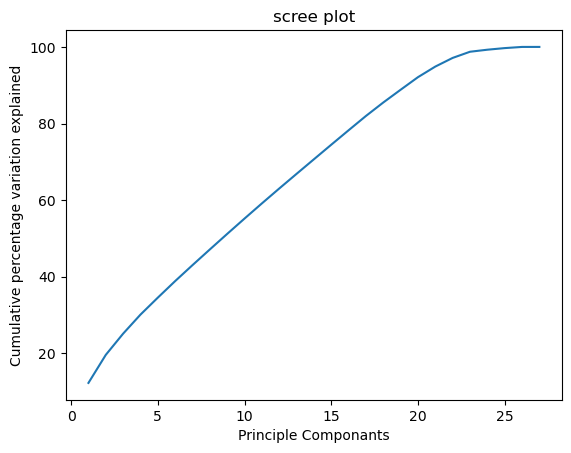

In [17]:
xs=np.arange(1,28)
plt.plot(xs, ys)
plt.title("scree plot")
plt.xlabel("Principle Componants")
plt.ylabel("Cumulative percentage variation explained")

In [27]:
pct = 90
print(pct, "% of variation is explained by ", np.sum(ys<=90), "principle componants")

90 % of variation is explained by  19 principle componants
